(24, 2, 192, 192, 18) (1, 30, 256, 256) (1, 30, 256, 256)
float32 complex64 complex128


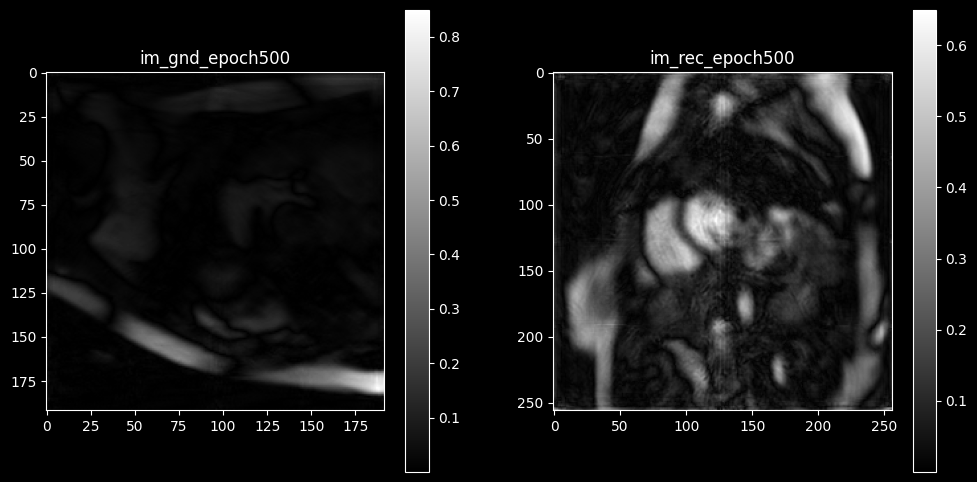

/data0/zhiyong/software/Anaconda3_2024/envs/k_gin_zzy/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data0/zhiyong/software/Anaconda3_2024/envs/k_gin_zzy/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24103 (\N{CJK UNIFIED IDEOGRAPH-5E27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


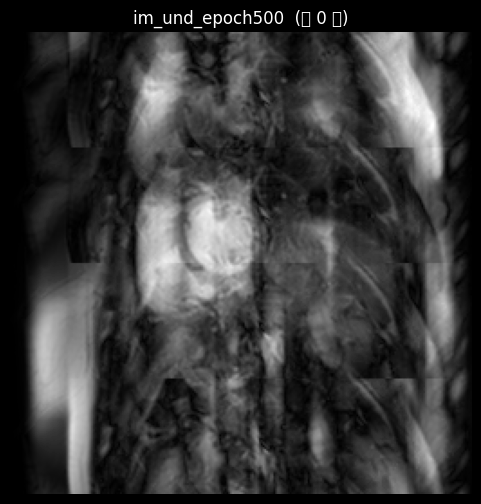

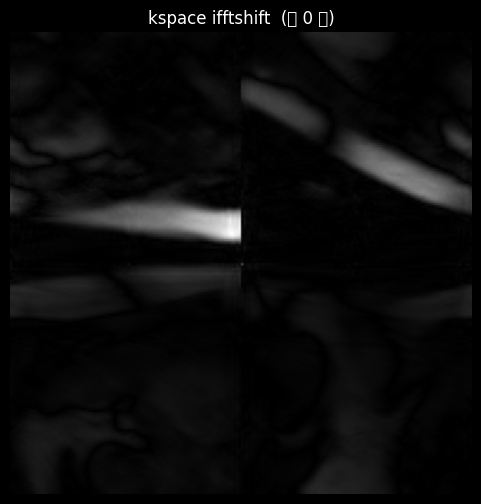

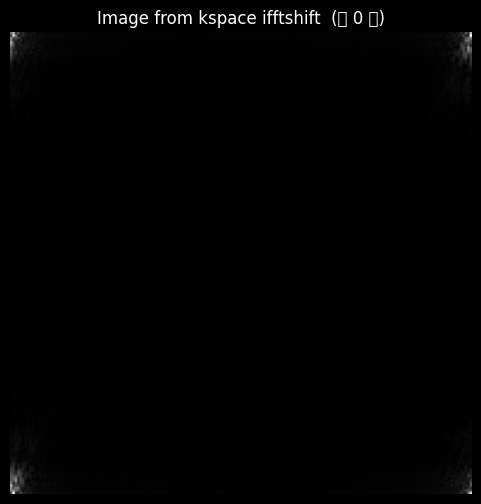

NameError: name 'data_t' is not defined

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.io import loadmat
from os.path import join
from utils import compressed_sensing as cs
# from cascadenet_pytorch.dnn_io import to_tensor_format, from_tensor_format

'''
跑100个epoch的结果:
Epoch 101/100
 time: 52.61929655075073s
 training loss:		0.018023
 testing loss:		0.001912
 base PSNR:		19.928110
 test PSNR:		24.175289
model parameters saved at ./models/model_epoch_100.npz
'''
# Load the .npy files
# file_path_1 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0223_2/last_epoch_k.npy"
# file_path_2 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0223_2/last_epoch_k_image.npy"
# file_path_1 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0223_2/last_epoch_k0.npy"
# file_path_2 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0223_2/last_epoch_k0_image.npy"
# file_path_1 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0223_3/last_epoch_k.npy"
# file_path_2 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0223_3/last_epoch_k_image.npy"

#/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_1/last_epoch_k_image.npy
# file_path_1 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_2/last_epoch_k.npy"
# file_path_2 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_2/last_epoch_k_image.npy"
# file_path_1 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_3/last_epoch_k.npy"
# file_path_2 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_3/last_epoch_k_image.npy"
# file_path_2 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_6/last_epoch_k_image.npy"
# file_path_1 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_1/last_epoch_out.npy"
# file_path_2 = "/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_1/last_epoch_out_image.npy"

# file_path_1 = '/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_6/last_epoch_x_recon_image.npy'
# file_path_1 = '/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/0224_3/last_epoch_out_image.npy'

#/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_gnd_epoch100.npy
#/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_gnd_epoch100.png

#/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_rec_epoch100.npy
#/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_rec_epoch100.png


#/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_und_epoch100.npy
#/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_und_epoch100.png

# file_path_1 = '/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_gnd_epoch500.npy'
# file_path_2 = '/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_gnd_epoch100.png'
# file_path_2 = '/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_rec_epoch100.npy'

file_path_1 = '/data0/zhiyong/code/github/itzzy_git/k_gin_base/models/runs/kt_next_test_run_test_0228_3/im_recon.npy'

#/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_rec_epoch200.npy
file_path_2 = '/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_rec_epoch500.npy'
file_path_3 = '/data0/zhiyong/code/github/kt-Dynamic-MRI-Reconstruction/results/im_und_epoch500.npy'
# Read the files
data_1 = np.load(file_path_1)
data_2 = np.load(file_path_2)
data_3 = np.load(file_path_3)



# Get the dimensions of the data
dimensions_1 = data_1.shape
dimensions_2 = data_2.shape
dimensions_3 = data_3.shape


print(dimensions_1, dimensions_2,dimensions_3) #(24, 2, 192, 192, 18) (1, 30, 256, 256) (1, 30, 256, 256)
print(data_1.dtype,data_2.dtype,data_3.dtype) #float32 complex64 complex64

# data_t_1 = data_1[0,0,:,:]
data_t_1 = data_1[0,0,:,:,0]
data_t_2 = data_2[0,0,:,:]
data_t_3 = data_3[0,0,:,:]

# Displaying the first slice of the first channel for both data1 and data2
plt.figure(figsize=(12, 6))

# For data1 (complex), we can show the magnitude
plt.subplot(1, 2, 1)
plt.imshow(np.abs(data_t_1), cmap='gray')
plt.title('im_gnd_epoch500')
plt.colorbar()

# For data2 (float), we can show the data directly
plt.subplot(1, 2, 2)
# plt.imshow(data_2[0, 0], cmap='gray')
plt.imshow(np.abs(data_t_2), cmap='gray')
plt.title('im_rec_epoch500')
plt.colorbar()
plt.show()

data_t_3_np = np.abs(data_t_3)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(data_t_3_np, cmap='gray')  # 使用灰度颜色映射
plt.title("im_und_epoch500  (第 0 帧)")
plt.axis('off')
plt.show()

k_und_frame = data_t_1 # 选择第 0 帧（如果是 3D 数据）
# 对 k-space 数据进行逆傅里叶变换，转换回图像域
k_und_frame = np.fft.ifftshift(k_und_frame)  # 逆傅里叶变换
# 计算图像域数据的幅值
im_magnitude = np.abs(k_und_frame)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("kspace ifftshift  (第 0 帧)")
plt.axis('off')
plt.show()

# k_und_frame = data_1[0,0,:,:]  # 选择第 0 帧（如果是 3D 数据）
# 对 k-space 数据进行逆傅里叶变换，转换回图像域
im_from_k_und = np.fft.ifft2(k_und_frame)  # 逆傅里叶变换
# 计算图像域数据的幅值
im_magnitude = np.abs(im_from_k_und)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from kspace ifftshift  (第 0 帧)")
plt.axis('off')
plt.show()

# 假设 k_und_from_im 是 k-space 数据，形状为 [256, 256]
# 如果 k_und_from_im 是 3D 数据（例如 [256, 256, 30]），需要选择特定的帧
k_und_frame = data_t  # 选择第 0 帧（如果是 3D 数据）
# 对 k-space 数据进行逆傅里叶变换，转换回图像域
im_from_k_und = np.fft.ifft2(k_und_frame)  # 逆傅里叶变换
# 计算图像域数据的幅值
im_magnitude = np.abs(im_from_k_und)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from data_1 (第 0 帧)")
plt.axis('off')
plt.show()

k_und_frame_2 = np.fft.fftshift(data_t)  # 选择第 0 帧（如果是 3D 数据）
# 对 k-space 数据进行逆傅里叶变换，转换回图像域
im_from_k_und_2 = np.fft.ifft2(k_und_frame_2)  # 逆傅里叶变换
# 计算图像域数据的幅值
im_magnitude_2 = np.abs(im_from_k_und_2)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from data_1 fftshift 2(第 0 帧)")
plt.axis('off')
plt.show()

# 假设 k_und_from_im 是 k-space 数据，形状为 [256, 256]
# 如果 k_und_from_im 是 3D 数据（例如 [256, 256, 30]），需要选择特定的帧
# k_und_frame = data_1[0,0,:,:]  # 选择第 0 帧（如果是 3D 数据）
# k_und_from_im_center = np.fft.fftshift(data_1[0,0,:,:])
# k_und_from_im = np.fft.ifftshift(data_1[0,0,:,:])
k_und_from_im = data_t
# 对 k-space 数据进行逆傅里叶变换，转换回图像域
im_from_k_und = np.fft.ifft2(k_und_from_im)  # 逆傅里叶变换
im_from_k_und = np.fft.fftshift(im_from_k_und)
# 计算图像域数据的幅值
im_magnitude = np.abs(im_from_k_und)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from data_1 ifftshift(第 0 帧)")
plt.axis('off')
plt.show()


# k_und_from_im = data_1[0,0,:,:]
# 对 k-space 数据进行逆傅里叶变换，转换回图像域
im_from_k_und = np.fft.fft2(im_from_k_und)  # 逆傅里叶变换
# im_from_k_und = np.fft.fftshift(im_from_k_und)
# 计算图像域数据的幅值
im_magnitude = np.abs(im_from_k_und)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from data_1 ifftshift 2(第 0 帧)")
plt.axis('off')
plt.show()


# im_from_k_und = np.fft.fft2(im_from_k_und)  # 逆傅里叶变换
im_from_k_und = np.fft.fftshift(im_from_k_und)
# 计算图像域数据的幅值
im_magnitude = np.abs(im_from_k_und)  # 取模
# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from data_1 ifftshift 2(第 0 帧)")
plt.axis('off')
plt.show()